## Practical 1

The objectives of this practical are to learn:

- How to generate a training dataset
- How to plot a dataset
- How to train a model
- How to use a trained model to make predictions
- How to plot the dataset, the model and predictions
- How to use some relevant NumPy functions
- How to use sklearn LinearRegression class to train a model and use it to make predictions
- How to implement the gradient descent algorithm and use it to train a model

This practical will help lay the foundations of solving an real-world application problem using linear regression.


## Part 1 (Tutorials): Linear regression with sklearn and gradient descent

In this tutorial, we go through the following steps:

First, we generate a training dataset.

Second, we implement linear regression with a number of functions from sklearn.

Finally, we implement linear regression with our own implementation of the gradient descent algorithm. As we'll cover the algorithm in Week 2, this hands-on experience can probably help us better understand it when it's covered in the lecture.

Note that there are comments in the code that describe in detail what each part of the program does.

We use a number of functions from NumPy and Matplotlib. For a quick reference, follow the links below:

https://numpy.org

https://matplotlib.org


### Tutorial 1: Linear regression using sklearn

### Generate a training dataset

We use a make_regression() function from scikit-learn to generate a training dataset:

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html

For User Guide on the generated datasets, follow the link:

https://scikit-learn.org/stable/datasets/sample_generators.html

Here is a tutorial on How to Generate Test Datasets in Python with scikit-learn:

https://machinelearningmastery.com/generate-test-datasets-python-scikit-learn/


In [67]:
# generate a training dataset for linear regression

# refer to NumPy documentation for all NumPy functions used, e.g. interp(), hstack() and ones()

from sklearn.datasets import make_regression
import numpy as np

# produces the same set of random numbers each time they are generated
np.random.seed(0)

# noise = 20 - the standard deviation of the gaussian noise applied to the output
# X is a 2-d array with ith row, a 1-d array itself, representing the n features of the ith data point
# y is a 1-d array with the ith element representing the target of the ith data point

# In this case, we generate a dataset of 100 data points, each of which has 1 feature only
X, y = make_regression(n_samples=100, n_features=1, noise=20)

# interpolate feature values into square metres (between 20 and 80)
# e.g. array([[2],[1],[3]]) is interpolated into array[[50.],[20.],[80.]]
# These interpolations are really useful for scaling up or scaling down axes, e.g. for between 0 and 1

# interpolate feature values into sizes (between 20 and 80 square metres)
X = np.interp(X, (X.min(), X.max()), (20, 80))

# interpolate targets into prices (between 100k and 500k)
y = np.interp(y, (y.min(), y.max()), (100, 500))

# add x0 = 1 as a dummy feature into features by stacking two one-column arrays in sequence horizontally
X = np.hstack((np.ones(shape=(len(X), 1)), X))

# you can uncomment either X or y to see what value it has
#X
#y

# you can also print either X or y to see what are printed
#print(X)
#print(y)

# Note that both X and y are NumPy arrays

### Ploting the dataset 

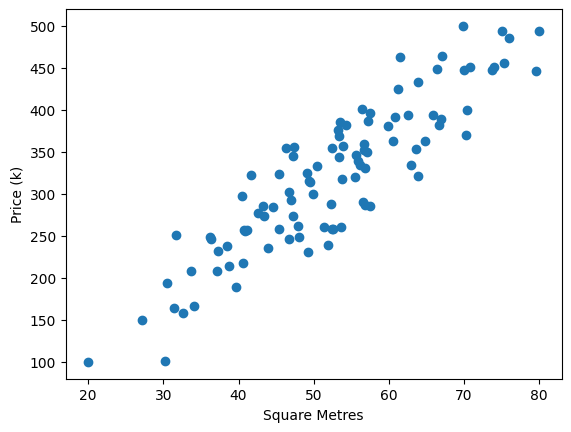

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt

# refer to Matplotlib documentation for all the functions used

# Note that scatter() takes two 1-D NumPy arrays as arguments
plt.scatter(X[:,1], y)
#print("X:")
#print(X[:,1]) # 1st element on very row

#print("y:")
#print(y)
plt.xlabel('Square Metres')
plt.ylabel('Price (k)')
plt.show()

### Use the LinearRegression class in sklearn to train the model

Refer to sklearn.linear_model.LinearRegression documentation for details about the LinearRegression class:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [69]:
# train a new model using linear regression from sklearn

from sklearn.linear_model import LinearRegression

# use LinearRegression() creates a trained linear regression model
regr = LinearRegression().fit(X[:,1].reshape(-1, 1), y) 

# you can uncomment one of them to see the array structuress before and after it's been reshaped
# X[:,1]
# X[:,1].reshape(-1, 1)

#### Use two functions, coef_ and intercept_ with the trained model to get co-efficients and the intercepts, i.e. the values of $\Theta$ in the model

In [70]:
# Print the intercept and co-efficients with the trained linear regression model
print('Co-efficients:', regr.coef_)
print('Intercept:', regr.intercept_)

Co-efficients: [6.2960143]
Intercept: -9.664363209895669


**Note that regr.coef_ gets the co-efficient for $x_1$, $\theta_1$ while regr.intercept_ gets the intercept for $x_0$ (with a dummy value of 1, $\theta_0$, which is also referred to as bias)**

In [71]:
# y_hat predicted by the new model

y_hat = regr.predict(X[:,1].reshape(-1, 1))

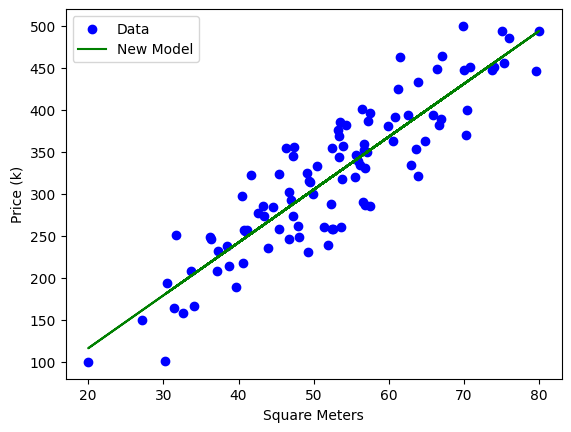

In [72]:
# plot the training data and the new model

plt.scatter(X[:,1], y, c='b', label='Data')
plt.plot(X[:,1], y_hat, c='g', label='New Model') 

plt.legend(loc='best')

plt.xlabel('Square Meters')
plt.ylabel('Price (k)')
plt.show()

In [73]:
# make two predictions using the new model

new_x = np.array([[1, 45], [1, 75]])
new_y_hat = regr.predict(new_x[:,1].reshape(-1, 1)) # use the new model to predict
new_y_hat

array([273.65628047, 462.53670959])

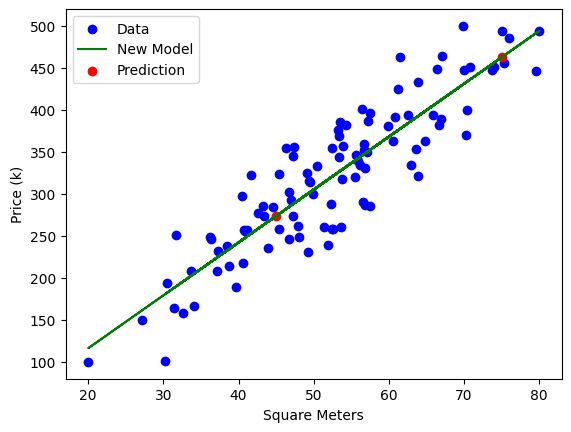

In [74]:
# plot the training data, new model and predictions

plt.scatter(X[:,1], y, c='b', label='Data')
plt.plot(X[:,1], y_hat, c='g', label='New Model') 

plt.scatter(new_x[:,1], new_y_hat, c='r', label='Prediction')

plt.legend(loc='best')

plt.xlabel('Square Meters')
plt.ylabel('Price (k)')
plt.show()

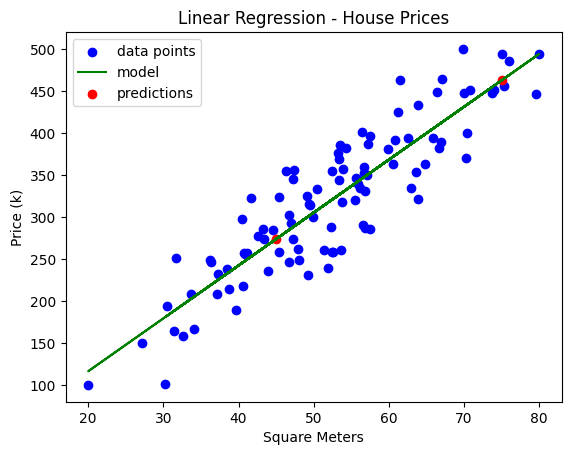

In [75]:
# display with data points, the model, plus two predictions in a figure
fig, ax = plt.subplots()  # create a figure and an axes in the figure

ax.set_title("Linear Regression - House Prices")  # add a title to the axes
ax.set_xlabel('Square Meters') # add an x-label to the axes
ax.set_ylabel('Price (k)') # add a y-label to the axes
ax.scatter(X[:,1], y, c = 'b', label='data points') # given dataset, pairs of values of x and y
ax.plot(X[:,1], y_hat, c = 'g', label='model')  # plot the model that best fits the training dataset
ax.scatter(new_x[:,1], new_y_hat, c = 'r', label='predictions')  # plot two predictions
ax.legend()  # add a legend
fig.savefig('linear-regression-house-prices.png') # save the figure

### Tutorial 2: Linear regression with the gradient descent algorithm

***
$\mathbf{\text{Gradient decent algorithm}}$<br>
***
input: $X$ and $y$<br>
output: $\theta$
1. initialisation<br>
    $\theta := [0, 0]$, $iter\_count := 0$, $lr := 0.0001$, $tolerance := 0.0001$ and $convergence := false$<br>
2. while not($convergence$) do<br>
    (a) $gradient, mse := calc\_gradient(\theta, X, y)$<br>
    (b) $\hat{\theta} := \theta - lr * gradient$<br>
    (c) if $\sum{|\hat{\theta} - \theta|} \lt tolerance$ then $convergence := true$ else $\theta := \hat{\theta}$, $iter\_count += 1$<br>
3. return $\theta$

$calc\_gradient(\theta, X,y):$<br>
1. $\hat{y} := X \cdot \theta$<br>
2. $error := y - \hat{y}$<br>
3. $gradient := -1.0/m \times error \cdot X$<br>
4. $mse := mean(error^2)$<br>
5. return $gradient$, $mse$

### It would be very useful if you could spend more time on this very important algorithm to fully understand it

### Implement the gradient decent algorithm

In [76]:
# use gradient descent to find thetas to fit the model to the training dataset

def calc_gradient(thetas, x, y):
    dick_hat = x.dot(thetas) 
    error = y - dick_hat # do we really need to flatten it as it's 1-d already? 
    gradient = -(1.0/len(x)) * error.dot(x) # ith column in x  contains ith features across every example
    
    mse = np.mean(error**2) # this calculates the mean squared error
    #mse = np.mean(error**2)/2 # this calculates half of the mean squared error as in the lecture slides
    
    return gradient, mse # a function can return two values

# initialisation

# thetas = [0, 0] # start at this set of thetas
thetas = [0, 0] # start at this set of thetas
iter_count = 0
lr = 0.0001 # learning rate - it's a tiny value/step
tolerance = 0.0001 # accepted for convergence
#tolerance = 0.01 # changed to much higher tolerance

print(X.shape)
print(y.shape)
print(thetas.shape)

while True:
    gradient, mse = calc_gradient(thetas, X, y) 
    thetas_hat = thetas - lr * gradient # this calculates the new thetas
    
    # this is similar to stochastic gradient descent (i.e. converge when thetas ocsillate)
    # when changes to thetas are very small, mse is close to the min
    # remember that the cost function is 1/2*mse
    # 
    if np.sum(abs(thetas_hat - thetas)) < tolerance: 
        print("CONVERGED!!!!!!")
        break
        
    thetas = thetas_hat
    
    if iter_count % 1 == 0:
        print("Iteration: %i - mse: %.3f" % (iter_count, mse)) # note that the cost function is half of mse
        
        # You can uncomment either of thetas and gradient to see what it looks like in each iteration
        #print("Theta:")
        #print(thetas)
        #print("gradient:")
        #print(gradient)
    
    iter_count += 1
        

(100, 2)
(100,)


AttributeError: 'list' object has no attribute 'shape'

### It would be very useful if you could spend more time on the implementation of this very important algorithm to fully upderstand it.

### Generate the linear regression model using the $\Theta$

thetas: [0.10863272 6.11978207]


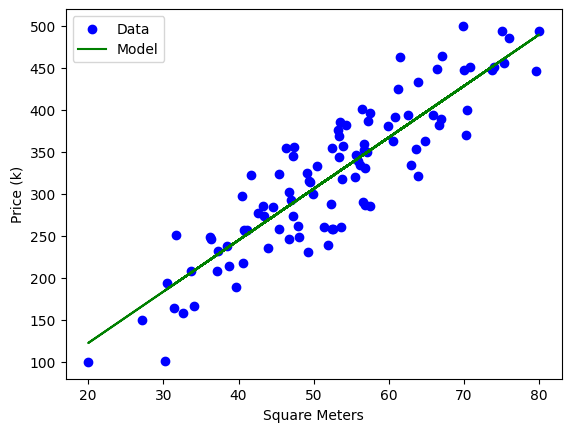

In [ ]:
# use found thetas to generate a model

print("thetas:", thetas) # print the values of thetas

y_hat = X.dot(thetas)

# We scatter the data points first
plt.scatter(X[:,1], y, c='b', label='Data')

# We then plot the model which is a straight line
plt.plot(X[:,1], y_hat, c='g', label='Model')

plt.legend(loc='best')

plt.xlabel('Square Meters')
plt.ylabel('Price (k)')
plt.show()

### Use the trained model to make predictions

In [ ]:
# use the model to make two predictions
# i.e. calculate y_hat with the thetas found by the training

new_x = np.array([[1, 45], [1, 75]]) # (note that we have also have a value of 1 for x0)
new_y_hat = new_x.dot(thetas)
print(new_y_hat)

[275.49882602 459.09228822]


### Plot the data, model and predictions

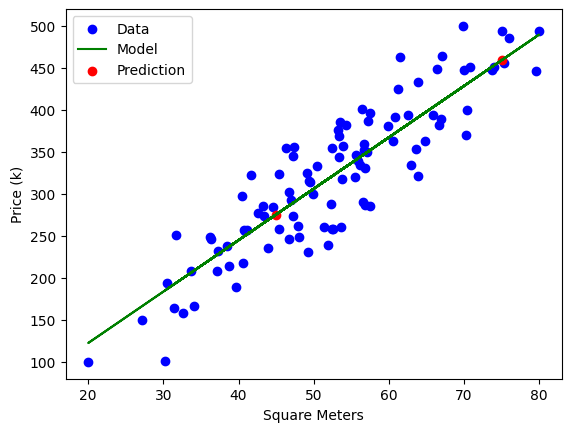

In [ ]:
# plot the training data, model and predictions

plt.scatter(X[:,1], y, c='b', label='Data')
plt.plot(X[:,1], y_hat, c='g', label='Model') 

# We scatter the two data points with the predictions, which are apparently on the straight line of the model
plt.scatter(new_x[:,1], new_y_hat, c='r', label='Prediction')

plt.legend(loc='best')

plt.xlabel('Square Meters')
plt.ylabel('Price (k)')
plt.show()

### Plot the data, model and predictions in a figure

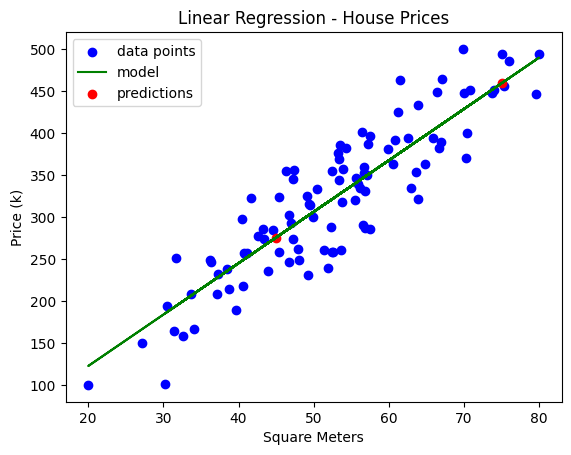

In [ ]:
# display with data points, the model, plus two predictions in a figure
fig, ax = plt.subplots()  # create a figure and an axes in the figure

ax.set_title("Linear Regression - House Prices")  # add a title to the axes
ax.set_xlabel('Square Meters') # add an x-label to the axes
ax.set_ylabel('Price (k)') # add a y-label to the axes
ax.scatter(X[:,1], y, c = 'b', label='data points') # given dataset, pairs of values of x and y
ax.plot(X[:,1], y_hat, c = 'g', label='model')  # plot the model that best fits the training dataset
ax.scatter(new_x[:,1], new_y_hat, c = 'r', label='predictions')  # plot two predictions
ax.legend()  # add a legend
fig.savefig('linear-regression-house-prices.png') # save the figure

## Part 2 (Exercises)



### Exercise 1 (using sklearn): 
In this exercise, we use a toy dataset provided by sklearn, the diabetes dataset, which can be loaded using one of the functions in sklearn. For further information, refer to:

https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset

We want to load the dataset, train a simple linear regression model and use it to make predictions. We also want to use matplotlib.pyplot to plot the dataset, model and predictions. 

For simplicity, we use one of the 10 features only (X), i.e. the bmi body mass index. The target (y) is a quantitative measure of disease progression one year after baseline, which we hypothsise is  linearly dependent on the bmi.

- Plot the data points using the above X and y.
- Run the code in the following cell and discuss the coefficients of the linear model (intercept and slope) and whether the fitted linear model is a good model.

### Exercise 2 (using the gradient descent algorithm): 
Add another feature to the house price prediction problem, e.g. the number of bedrooms. Refactor the program in Tutorial 1 so the program can run on the new dataset.

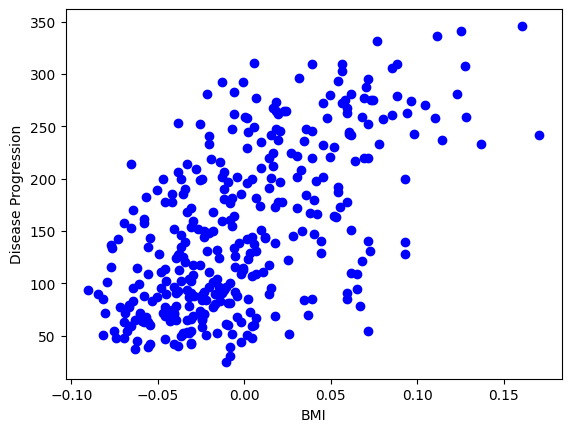

Co-efficients: [981.65543614]
Intercept: 152.28824927379569


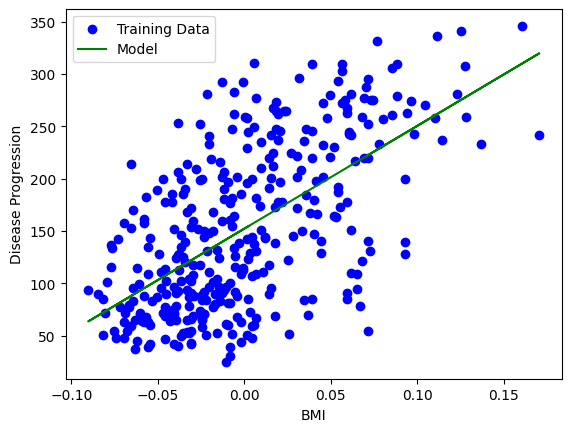

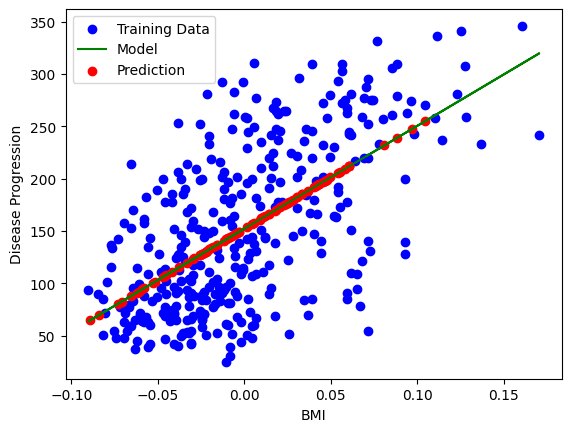

In [ ]:
##load the diabeties dataset from sklearn

from sklearn.datasets import load_diabetes

import numpy as np

diabetes = load_diabetes()

X = diabetes.data[:,2]

y = diabetes.target

##split the dataset into training and testing datasets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

##plot the training data points

plt.scatter(X_train, y_train, c='b', label='Training Data')

plt.xlabel('BMI')
plt.ylabel('Disease Progression')

plt.show()

##train a linear regression model using the training dataset

regr = LinearRegression().fit(X_train.reshape(-1, 1), y_train)

##print the intercept and co-efficients of the trained model

print('Co-efficients:', regr.coef_)
print('Intercept:', regr.intercept_)

##plot the training data points and the trained model

y_hat = regr.predict(X_train.reshape(-1, 1))

plt.scatter(X_train, y_train, c='b', label='Training Data')

plt.plot(X_train, y_hat, c='g', label='Model')

plt.legend(loc='best')

plt.xlabel('BMI')

plt.ylabel('Disease Progression')

plt.show()

##make predictions using the new model on the testing dataset

new_data = []

for i in range (0, len(X_test)):
	new_data.append([1, X_test[i]])


new_data = np.array(new_data)

new_y_hat = regr.predict(new_data[:,1].reshape(-1, 1))

##plot the training data points, the trained model and the predictions

plt.scatter(X_train, y_train, c='b', label='Training Data')

plt.plot(X_train, y_hat, c='g', label='Model')

plt.scatter(X_test, new_y_hat, c='r', label='Prediction')

plt.legend(loc='best')

plt.xlabel('BMI')

plt.ylabel('Disease Progression')

plt.show()

	



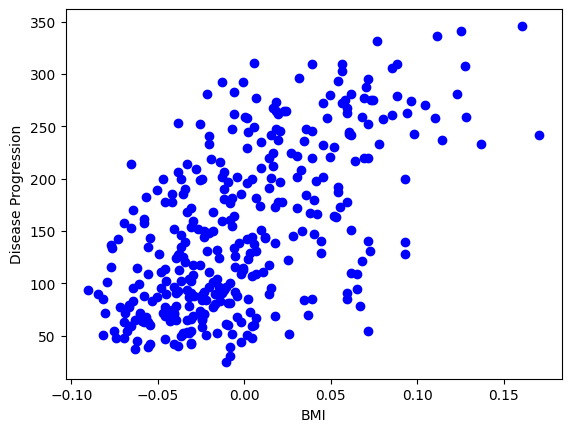

[ 0.00241654 -0.07734155 -0.03530688  0.00133873  0.02073935 -0.03638469
 -0.04069594  0.03259528  0.114509    0.02828403  0.06169621 -0.01267283
 -0.04069594 -0.00943939 -0.05794093  0.05307371 -0.00189471  0.05415152
  0.13714305 -0.00405033 -0.02991782  0.01966154 -0.05686312 -0.05578531
 -0.0902753  -0.02560657  0.07355214  0.07462995 -0.03854032  0.12313149
 -0.04392938 -0.03099563 -0.02560657 -0.04931844  0.05630715 -0.05578531
 -0.02237314  0.01427248  0.03798434  0.06708527  0.00672779  0.0164281
 -0.00728377  0.00888341  0.00026092 -0.06656343  0.05954058  0.05630715
 -0.02452876 -0.07626374 -0.03638469 -0.0374625   0.08540807  0.00241654
  0.01535029 -0.05686312 -0.04824063 -0.06440781 -0.03530688  0.00672779
 -0.00836158  0.00457217 -0.0105172   0.12852056  0.0703187   0.06169621
 -0.046085   -0.00836158 -0.03099563 -0.01806189  0.02612841  0.08540807
  0.01427248 -0.04500719 -0.00297252 -0.0816528  -0.02452876  0.01211685
  0.05954058 -0.02021751 -0.03961813  0.04445121  0.

ValueError: shapes (353,) and (2,) not aligned: 353 (dim 0) != 2 (dim 0)

In [ ]:
##load the diabeties dataset from sklearn

from sklearn.datasets import load_diabetes

import numpy as np

diabetes = load_diabetes()

X = diabetes.data[:,2]

y = diabetes.target

##split the dataset into training and testing datasets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

##plot the training data points

plt.scatter(X_train, y_train, c='b', label='Training Data')

plt.xlabel('BMI')
plt.ylabel('Disease Progression')

plt.show()







# thetas = [0, 0] # start at this set of thetas
thetas = [0, 0] # start at this set of thetas
iter_count = 0
lr = 0.0001 # learning rate - it's a tiny value/step
tolerance = 0.0001 # accepted for convergence
#tolerance = 0.01 # changed to much higher tolerance


print(X_train)
print(y_train)

print(X_train.shape)
print(y_train.shape)



while True:

	gradient, mse = calc_gradient(thetas, X_train, y_train) 
	thetas_hat = thetas - lr * gradient # this calculates the new thetas
	
	# this is similar to stochastic gradient descent (i.e. converge when thetas ocsillate)
	# when changes to thetas are very small, mse is close to the min
	# remember that the cost function is 1/2*mse
	# 
	if np.sum(abs(thetas_hat - thetas)) < tolerance: 
		print("CONVERGED!!!!!!")
		break
		
	thetas = thetas_hat
	
	if iter_count % 1 == 0:
		print("Iteration: %i - mse: %.3f" % (iter_count, mse)) # note that the cost function is half of mse
		
		# You can uncomment either of thetas and gradient to see what it looks like in each iteration
		#print("Theta:")
		#print(thetas)
		#print("gradient:")
		#print(gradient)
	
	iter_count += 1